In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
!mkdir animation_frames

mkdir: animation_frames: File exists


In [32]:
# Import 3D libraries
from mpl_toolkits.mplot3d import Axes3D

# It's always good to create a function for your plots
def plot3dsine(theta, phi, time):
    
    # Create figure
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')

    # Create data to plot (same as before)
    nx, ny = (150,150)
    xlim = 10
    ylim = 10
    x = np.linspace(-xlim,xlim,nx)
    y = np.linspace(-ylim,ylim,ny)
    # Create a mesh grid of the two arrays x and y
    xm, ym = meshgrid(x, y)
    # Compute a value on that mesh
    z = sin(np.sqrt(xm**2 + 3*ym**2) - time)/(xm**2 + ym**2)**(0.25)

    # Produce 3d plot, set axis and colorbar
    specs = {'cmap' : 'seismic', 'vmin' : -0.6, 'vmax' : 1.0}
    surf = ax.plot_surface(xm, ym, z, rstride = 1, cstride = 2, linewidth=0, **specs)
    cset = ax.contourf(xm, ym, z, zdir='z', offset=3, alpha = 0.2, **specs)
    cset = ax.contour(xm, ym, z, zdir='y', offset=-15, **specs)
    cset = ax.contour(xm, ym, z, zdir='x', offset=-15, **specs)

    ax.set_zlim(-1.01, 1.01)
    ax.set_axis_off() # Remove background axis and grid

    ax.view_init(elev=phi, azim=theta)
    fig.colorbar(surf, shrink=0.5, aspect=5)

Frame number:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

KeyboardInterrupt: 

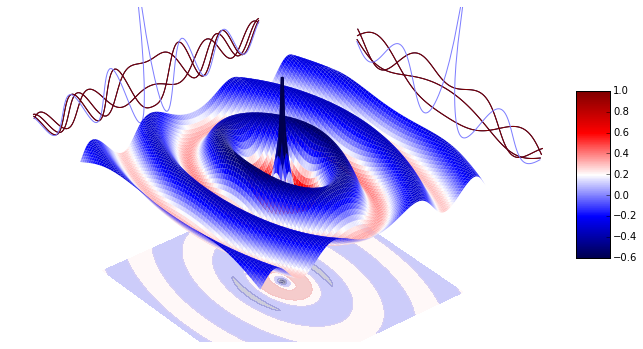

In [33]:

# Output a set of images using plot3dsine()
nframes = 100 # Use 100 to produce bigger animation
print('Frame number:')
for i in xrange(0,nframes,1):
    # 3D plot parameters as function of iterator i
    theta = 45 - 0.3*i
    phi = 290 + 0.4*i
    time = i/25.0
    # Call plotting function and save figure into file
    plot3dsine(theta,phi,time);
    plt.savefig('animation_frames/frame{0:07d}.png'.format(i+1));
    plt.close()
    print i,

In [ ]:
import os
os.system("avconv -r 10 -i /Users/pflomacpro/GeometricPDEs/animation_frames/frame%07d.png -b:v 1000k /Users/pflomacpro/GeometricPDEs/animation_frames/amovie.mp4")